# Analysis of Vodafone users' fluxes

The study of the flux of people inside urban areas is of paramount importance to achieve an optimal understanding of emerging critical issues in the local mobility, and to explore areas of potential improvements in the infrastructures and local transports.

The mobility of users within and toward Padova has been monitored using the data provided by the Vodafone mobile carrier, which provides the information based on the users' connections to the network cells.
The data provided by the carrier encompasses the monitoring of the users connected to the Vodafone network in Padova in a four-month period from February to May of 2018.

To provide statistical insights on the number and the flow of users, the data is aggregated based on the origin and movements of the users by averaging the number of connections during the time of the monitoring.

To further avoid privacy violation issues, all observations with less than 30 units (e.g. day-areas for which $<$30 users have contributed) have been discarded and/or merged into dedicated categories (indicated with "altro", or "other").


## Datasets 

The data is provided in `.csv` files.

* __day_od.csv__: table of the origins and destinations of the users averaged by the day of the week. The data is provided with details of the month, type of user (resident in Padova/Italian visitor/foreign visitor), country of provenance, together with the province and comune of the user (if available).
* __distinct_users_day.csv__: table of the number of distinct users by origin. The data is provided with details of the month, type of user (resident in Padova/Italian visitor/foreign visitor), country of provenance, together with the province and comune of the user (if available).

The information is stored in the fields according to the following scheme: 

- __MONTH__: month analyzed
- __DOW__: day analyzed
- __ORIGIN__: users' origin area (do not consider this field)
- __DESTINATION__: users' destination area (do not consider this field)
- __CUST_CLASS__: user type (resident / Italian visitor / foreigner visitor)
- __COD_COUNTRY__: users' country code (e.g. 222=Italy)
- __COD_PRO__: users' province code (e.g. 12=Varese) 
- __PRO_COM__: users' comune code (e.g. 12026=Busto Arsizio)
- __FLOW__: number of movements for given date-time (with a minimum of 30 users)
- __VISITORS__: overall number of users 

Together with the data files, three lookup-tables are provided to allow matching the Italian institute of STATistics (ISTAT) country, province and comune codes to the actual names.

* __codici_istat_comune.csv__: lookup file containing the mapping between _comune_ ISTAT code-names
* __codici_istat_provincia.csv__: lookup file containing the mapping between _province_ ISTAT code-names
* __codici_nazioni.csv__: lookup file containing mapping the _country_ code to its name

Additional information, useful for the study of the flow of users, as the number of inhabitants of each province and the distance between Padova and all other Italian provinces can be extracted based on the data collected by the ISTAT:

   - English: https://www.istat.it/en/analysis-and-products/databases, Italian: https://www.istat.it/it/dati-analisi-e-prodotti/banche-dati
   
   - English/Italian: https://www.istat.it/en/archive/157423, Italian: https://www.istat.it/it/archivio/157423
   
   - `.zip` package containing the distances between comuni in Veneto region: http://www.istat.it/storage/cartografia/matrici_distanze/Veneto.zip

If deemed useful, the open repository [https://github.com/openpolis/geojson-italy](https://github.com/openpolis/geojson-italy) contains a `.json` file with the geographical coordinates of the provences and comuni of Italy.


## Assignments

1. Data preparation: the csv files are originated from different sources, hence resulting in differences in the encoding and end-of-lines that have to be taken into account in the data preparation phase. Make sure each .csv file is properly interpreted.

   1.1 Ranking of visitors from foreign countries: based on the number of total visitors per each country, create a ranked plot of the first 20 countries with the most visitors
   
   1.2 Ranking of Italian visitors by province, weighted by the number of inhabitants: based on the number of total visitors per Italian province, create a ranked plot of the first 20 provinces with the most visitors taking into account the number of inhabitants.


2. Study of the visitors' fluxes: you are asked to provide indications on how to invest resources to improve the mobility towards Padova. Consider the three main directions of visitors and commuters getting to Padova through the main highways (from south, A13 towards Bologna-Roma; from west, A4 towards Milano-Torino; from north-east, A4 towards Venice-Trieste). Evaluate which of the three directions has to be prioritized.

   2.1 Consider a simplified case involving only the mid-range mobility, based on the number of visitors/commuters from the nearby regions only
   
   2.2 Consider the provinces located on the three directions that are mostly contributing to the flow of weekend visitors and working daily commuters by performing a more detailed study of the fluxes based on the day of the week. Use the data available to provide what you believe is the best possible answer.


3. Plot the distribution of the number of visitors by the distance of the province of origin. Determine which kind of function should be used to describe the distribution.

   3.1 Assuming an analytic form can be used to describe the trend, create a regression or a fit to estimate the expected number of visitors by the distance of the province of origin and the corresponding uncertainties. Illustrate the difference between the resulting regression with respect to the numbers provided by the Vodafone monitoring, and highlight the five most striking discrepancies from the expectations.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing Section**

In [2]:
import numpy as np
import pandas as pd
import chardet
import time
from functools import wraps

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['font.size'] = 16

# fig_size = plt.rcParams["figure.figsize"]
# fig_size[0] = 8
# fig_size[1] = 6
# plt.rcParams["figure.figsize"] = fig_size

# ***Task 1***

## **Data preparation:**
Because every data need diffrent decoder by defining a function we try to solve this problem.

Every data set that we have it before read using __read_data() Function.

In [3]:
# Read data
def read_data(path):
    """
    Read Data as Pandas DataFrame

    Args:
      path(String): path of data in csv form
    
    Return:
      Dataframe
    """

    # Find every data specific encoding type
    with open(path, 'rb') as rawdata:
        result = chardet.detect(rawdata.read(100000))

    df = pd.read_csv(path, encoding=result['encoding'])
    return df

In [4]:
'''
table of the origins and destinations of the users averaged by the day of the week.
'''

path_day_od = '/content/drive/MyDrive/HLP/day_od.csv'
# Read Data
df_day_od = read_data(path_day_od)

print(df_day_od.info())
print('#' * 100)
df_day_od.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193501 entries, 0 to 193500
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   MONTH        193501 non-null  object 
 1   DOW          193501 non-null  object 
 2   ORIGIN       193501 non-null  int64  
 3   DESTINATION  193501 non-null  int64  
 4   CUST_CLASS   193501 non-null  object 
 5   COD_COUNTRY  193501 non-null  int64  
 6   COD_PRO      186280 non-null  float64
 7   PRO_COM      186280 non-null  float64
 8   FLOW         193501 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 13.3+ MB
None
####################################################################################################


,MONTH,DOW,ORIGIN,DESTINATION,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,FLOW
0,Marzo,Domenica,108,300,visitor,222,28.0,-999.0,493
1,Maggio,Lunedì,300,101,visitor,222,93.0,-999.0,58
2,Febbraio,Sabato,108,207,visitor,222,28.0,-999.0,39
3,Aprile,Venerdì,109,121,resident,222,28.0,28060.0,106
4,Maggio,Giovedì,300,120,visitor,222,28.0,28103.0,136


In [5]:
'''
table of the number of distinct users by origin.
'''

path_distinct_users_day = '/content/drive/MyDrive/HLP/distinct_users_day.csv'
# Read Data
df_distinct_users_day = read_data(path_distinct_users_day)

print(df_distinct_users_day.info())
print('#' * 100)
df_distinct_users_day.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12845 entries, 0 to 12844
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DOW          12845 non-null  object 
 1   CUST_CLASS   12845 non-null  object 
 2   COD_COUNTRY  12838 non-null  float64
 3   COD_PRO      12312 non-null  float64
 4   PRO_COM      12312 non-null  float64
 5   VISITORS     12845 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 602.2+ KB
None
####################################################################################################


,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS
0,Mercoledì,visitor,222.0,35.0,35033.0,968
1,Lunedì,visitor,222.0,22.0,22098.0,64
2,Domenica,visitor,222.0,52.0,52032.0,516
3,Giovedì,visitor,222.0,108.0,108009.0,128
4,Giovedì,visitor,222.0,29.0,29048.0,512


In [6]:
"""
lookup file containing the mapping between comune ISTAT code-names
"""

path_codici_istat_comune = '/content/drive/MyDrive/HLP/codici_istat_comune.csv'
# Read Data
df_codici_istat_comune = read_data(path_codici_istat_comune)
df_codici_istat_comune.head()

,COD_PRO,PRO_COM,COMUNE,COMUNE_CAPOLUOGO
0,1,1001,Agliè,0
1,1,1002,Airasca,0
2,1,1003,Ala di Stura,0
3,1,1004,Albiano d'Ivrea,0
4,1,1005,Alice Superiore,0


In [7]:
"""
 lookup file containing the mapping between province ISTAT code-names
"""

path_codici_istat_provincia = '/content/drive/MyDrive/HLP/codici_istat_provincia.csv'
# Read Data
df_codici_istat_provincia = read_data(path_codici_istat_provincia)
# Because Aosta is not define in our papulation data we have to change its name
df_codici_istat_provincia.replace("Valle d'Aosta/Vallée d'Aoste", 'Aosta', inplace=True)
df_codici_istat_provincia.head()

,COD_REG,COD_PRO,PROVINCIA,PROV_SIGLA,Direction
0,1,1,Torino,TO,A4M
1,1,2,Vercelli,VC,A4M
2,1,3,Novara,NO,A4M
3,1,4,Cuneo,CN,A4M
4,1,5,Asti,AT,A4M


A hand made dataset which highlight every region code with its coresponding Direction and name

In [8]:
regions = {'COD_REG':list(range(1, 21)) + [-999],
          'Region_Name': ['Piedmont', 'Aosta Valley', 'Lombardy', 'Trentino-South Tyrol', 'VENETO', 'Friuli', 'Liguria',
                          'Emilia-Romagna', 'Tuscany', 'Umbria', 'Marche', 'Lazio', 'Abruzzo', 'Molise', 'Campania',
                          'Apulia', 'Basilicata', 'Calabria', 'Sicily', 'Sardinia', 'OTHER'],
          
          'Region_Dir' : ['WEST', 'WEST', 'WEST', 'NORTH', 'ORG', 'NORTH', 'WEST',
                          'SOUTH', 'SOUTH', 'SOUTH', 'SOUTH', 'SOUTH', 'SOUTH', 'SOUTH', 'SOUTH', 
                          'SOUTH', 'SOUTH', 'SOUTH', 'SOUTH', 'SOUTH', 'OTHER']
}

regions = pd.DataFrame(regions)
regions.head()

,COD_REG,Region_Name,Region_Dir
0,1,Piedmont,WEST
1,2,Aosta Valley,WEST
2,3,Lombardy,WEST
3,4,Trentino-South Tyrol,NORTH
4,5,VENETO,ORG


Merging all 3 data set:
1. Province Dataset
2. Cumune Dataset
3. Region Dataset

In [9]:
df_comune_province = df_codici_istat_comune.merge(df_codici_istat_provincia, on='COD_PRO')
df_comune_province_region = df_comune_province.merge(regions, on='COD_REG')
df_comune_province_region.head()

,COD_PRO,PRO_COM,COMUNE,COMUNE_CAPOLUOGO,COD_REG,PROVINCIA,PROV_SIGLA,Direction,Region_Name,Region_Dir
0,1,1001,Agliè,0,1,Torino,TO,A4M,Piedmont,WEST
1,1,1002,Airasca,0,1,Torino,TO,A4M,Piedmont,WEST
2,1,1003,Ala di Stura,0,1,Torino,TO,A4M,Piedmont,WEST
3,1,1004,Albiano d'Ivrea,0,1,Torino,TO,A4M,Piedmont,WEST
4,1,1005,Alice Superiore,0,1,Torino,TO,A4M,Piedmont,WEST


In [10]:
"""
lookup file containing mapping the country code to its name
"""

path_codici_nazioni = '/content/drive/MyDrive/HLP/codici_nazioni.csv'
# Read Data
df_codici_nazioni = read_data(path_codici_nazioni)
df_codici_nazioni.head()

,COD_COUNTRY,COUNTRY_NAME_IT
0,212,Monaco
1,219,Croazia
2,226,Romania
3,238,Danimarca
4,246,Lituania


## **TASK 1.1**

### **Ranking of visitors from foreign countries:**
Extracting Only Foreigner user that have visited padova according to vodafone monitoring

In [11]:
"""
Using Distinct user table and merge it to country table We want to extract number of user from foreigner countries
"""

# Extract Data
foreigner_user = df_distinct_users_day['CUST_CLASS']=='foreigner'
df_foreigner_user = df_distinct_users_day[foreigner_user].reset_index().drop(['index', 'PRO_COM', 'COD_PRO'], axis=1)
# Merge two Table to get country name
df_foreigner_user = pd.merge(df_foreigner_user, df_codici_nazioni, how='inner', on='COD_COUNTRY')
df_foreigner_user.head()

,DOW,CUST_CLASS,COD_COUNTRY,VISITORS,COUNTRY_NAME_IT
0,Giovedì,foreigner,226.0,8944,Romania
1,Venerdì,foreigner,226.0,9840,Romania
2,Lunedì,foreigner,226.0,8388,Romania
3,Domenica,foreigner,226.0,7028,Romania
4,Sabato,foreigner,226.0,7992,Romania


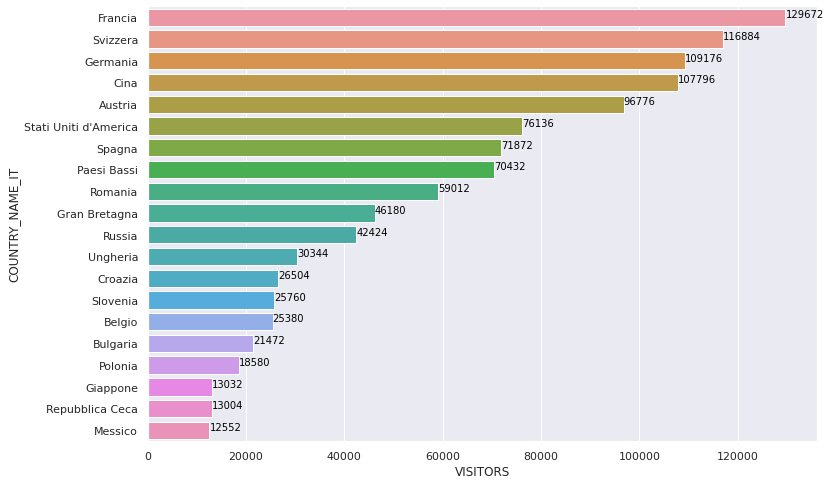

In [12]:
"""
Group the Foregner table by the [VISITORS] Coulumn
"""
# Group by the coutry
foreigner_country_user = df_foreigner_user.groupby('COUNTRY_NAME_IT')['VISITORS'].agg('sum').reset_index()
# Top 20 Country Visitor
top_20_country = foreigner_country_user.nlargest(20, 'VISITORS').reset_index()

# plt.barh(y, x)

g = sns.barplot(y='COUNTRY_NAME_IT', x='VISITORS', data=top_20_country)
for index, row in top_20_country.iterrows():
    plt.text(row.VISITORS, row.name, row.VISITORS, color='black', ha='left', size=10)

## **TASK 1.2**

### **Ranking of visitors in Italy:**
Extracting Only Visitor users that have visited padova according to vodafone monitoring

In [13]:
"""
Using Distinct user table and merge it to province table, We want to extract number of Italian visitor
"""

# Extract Data
visitor_user = df_distinct_users_day['CUST_CLASS']=='visitor'
df_visitor_user = df_distinct_users_day[visitor_user].reset_index().drop(['index'], axis=1)

# Merge two Table to get province name
df_visitor_user = pd.merge(df_visitor_user, df_codici_istat_provincia, how='inner', on='COD_PRO')
df_visitor_user.head()

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS,COD_REG,PROVINCIA,PROV_SIGLA,Direction
0,Mercoledì,visitor,222.0,35.0,35033.0,968,8,Reggio nell'Emilia,RE,A13
1,Sabato,visitor,222.0,35.0,35040.0,112,8,Reggio nell'Emilia,RE,A13
2,Lunedì,visitor,222.0,35.0,35027.0,76,8,Reggio nell'Emilia,RE,A13
3,Mercoledì,visitor,222.0,35.0,35004.0,36,8,Reggio nell'Emilia,RE,A13
4,Lunedì,visitor,222.0,35.0,35036.0,156,8,Reggio nell'Emilia,RE,A13


In [14]:
visitor_user = df_visitor_user.groupby('PROVINCIA')['VISITORS'].agg('sum').reset_index()
visitor_user.head()

,PROVINCIA,VISITORS
0,Agrigento,596
1,Alessandria,5576
2,Ancona,11656
3,Aosta,1416
4,Arezzo,4416


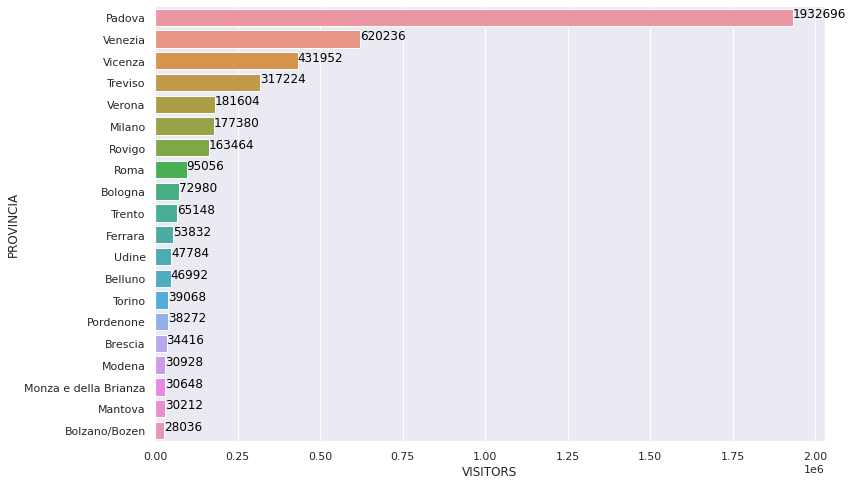

In [15]:
# Plotting most number of visitors coming to padova
# Without considering their province inhabitatnt number
top_20_province = visitor_user.nlargest(20, 'VISITORS').reset_index()

g = sns.barplot(y='PROVINCIA', x='VISITORS', data=top_20_province)
for index, row in top_20_province.iterrows():
    g.text(row.VISITORS, row.name, row.VISITORS, color='black', ha='left', size=12)

Download Population Dataset from ISTAT Website

In [21]:
# Downloading population dataset for this task
!wget http://dati.istat.it/FileView2.aspx?IDFile=2b450ffb-43cc-48f2-8623-ea1915350230

--2022-07-20 06:31:18--  http://dati.istat.it/FileView2.aspx?IDFile=2b450ffb-43cc-48f2-8623-ea1915350230
Resolving dati.istat.it (dati.istat.it)... 193.204.90.1
Connecting to dati.istat.it (dati.istat.it)|193.204.90.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 0
Saving to: ‘FileView2.aspx?IDFile=2b450ffb-43cc-48f2-8623-ea1915350230’

FileView2.aspx?IDFi     [ <=>                ]       0  --.-KB/s    in 0s      

2022-07-20 06:31:19 (0.00 B/s) - ‘FileView2.aspx?IDFile=2b450ffb-43cc-48f2-8623-ea1915350230’ saved [0/0]



In [22]:
# Unzip downloaded dataset of population
!unzip -qq /content/FileView2.aspx?IDFile=2b450ffb-43cc-48f2-8623-ea1915350230

unzip:  cannot find or open /content/FileView2, /content/FileView2.zip or /content/FileView2.ZIP.


In [33]:
path_population = '/content/drive/MyDrive/HLP/population_2019.csv'
# Read Population Dataset
df_population = pd.read_csv(path_population, sep=',',)

In [34]:
# Extract needed row from population dataset
df_population = df_population[df_population['Age'] == 'total']
df_population = df_population[df_population['Marital status'] =='total']
df_population = df_population[df_population['Gender'] == 'total']
df_population = df_population[df_population['TIME'] == 2019] 

df_population = df_population[['Territory', 'Value']].drop_duplicates(subset=['Territory']).reset_index().drop('index', axis='columns')
# For sake of good view changed column name
df_population.rename(columns={'Value':'Population'}, inplace=True)
# df_population.replace('Aosta', "Valle d'Aosta/Vallée d'Aoste", inplace=True)
df_population.head()

,Territory,Population
0,Italy,59816673
1,Nord-ovest,15998031
2,Piemonte,4328565
3,Torino,2238663
4,Vercelli,170493


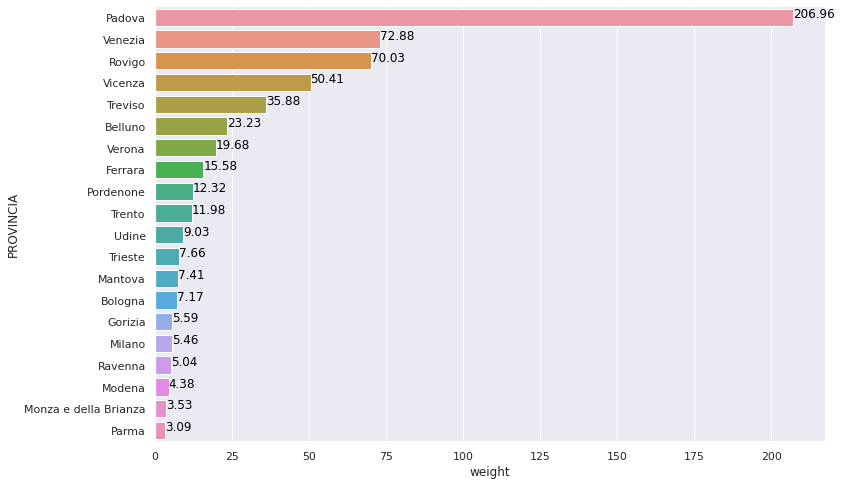

In [35]:
# Merge <visitor_user> into <population> Data frame
df_visitor_user_pupulation = visitor_user.merge(df_population, left_on='PROVINCIA', right_on='Territory')
# Compute weighted numebr of every province according to their populations
df_visitor_user_pupulation['weight'] = (df_visitor_user_pupulation['VISITORS'] / df_visitor_user_pupulation['Population'] * 100).round(2)
# Compute 20 largest portion of every province
top_20_province = df_visitor_user_pupulation.nlargest(20, 'weight').reset_index().drop('index', axis=1)

g = sns.barplot(y='PROVINCIA', x='weight', data=top_20_province)
for index, row in top_20_province.iterrows():
    g.text(row.weight, row.name, row.weight, color='black', ha='left', size=12)

# ***Task 2***

## **TASK 2.1**

### **Nerby Region Visitors:**
In this case we only consider region that are connected to Veneto.

In [36]:
# Defining Nearby Region (In this case region that are neighbour with veneto)
nearby_region = ['Friuli', 'Emilia-Romagna', 'Lombardy', 'Trentino-South Tyrol']
nearby_region = df_comune_province_region.Region_Name.isin(nearby_region)

nearby_region_df = df_comune_province_region[nearby_region]
nearby_region_df = nearby_region_df.reset_index().drop('index', axis=1)
nearby_region_df.head()

,COD_PRO,PRO_COM,COMUNE,COMUNE_CAPOLUOGO,COD_REG,PROVINCIA,PROV_SIGLA,Direction,Region_Name,Region_Dir
0,12,12001,Agra,0,3,Varese,VA,A4M,Lombardy,WEST
1,12,12002,Albizzate,0,3,Varese,VA,A4M,Lombardy,WEST
2,12,12003,Angera,0,3,Varese,VA,A4M,Lombardy,WEST
3,12,12004,Arcisate,0,3,Varese,VA,A4M,Lombardy,WEST
4,12,12005,Arsago Seprio,0,3,Varese,VA,A4M,Lombardy,WEST


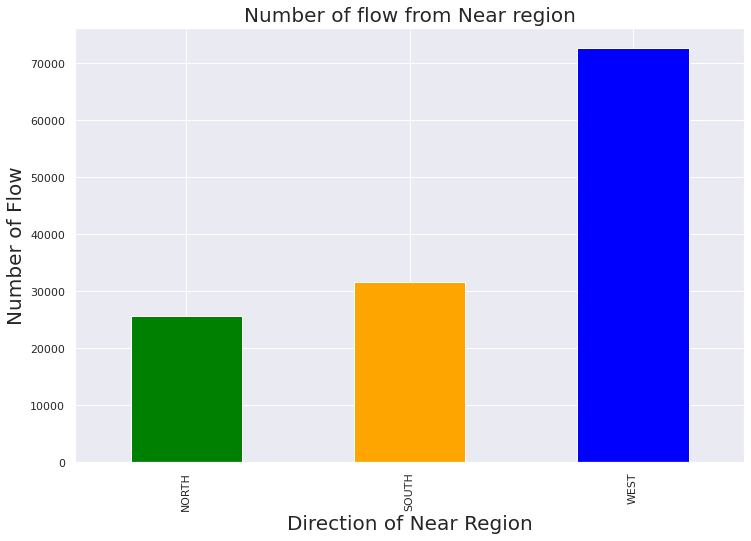

In [37]:
# Extracting number of FLOW of user in nearby region acording to their direction
df_nearby_flow = df_day_od.merge(nearby_region_df, on=['COD_PRO', 'PRO_COM'])
near_flow = df_nearby_flow.groupby('Region_Dir')['FLOW'].sum()

near_flow.plot(kind='bar', color=['green', 'orange', 'blue'])
plt.xlabel('Direction of Near Region', fontsize=20)
plt.ylabel('Number of Flow', fontsize=20)
plt.title('Number of flow from Near region', fontsize=20)

plt.show()

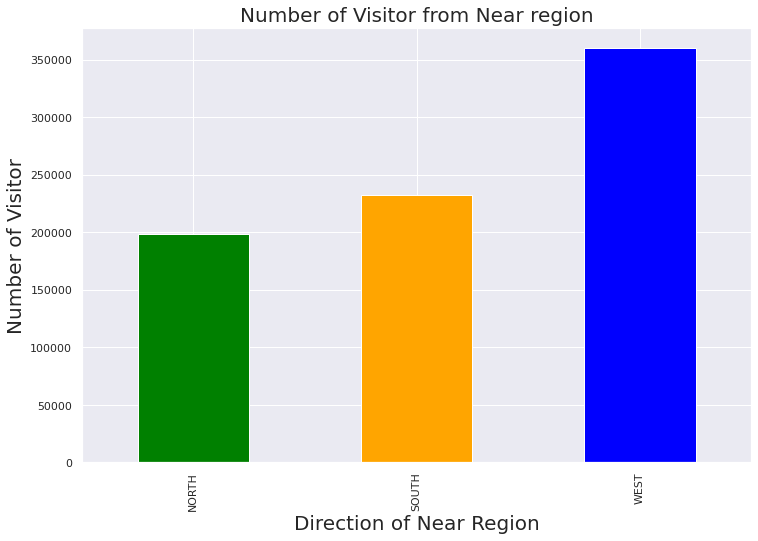

In [38]:
# Extracting number of visitor in nearby region acording to their direction
df_nearby_visitor = df_distinct_users_day.merge(nearby_region_df, on=['COD_PRO', 'PRO_COM'])
near_flow = df_nearby_visitor.groupby('Region_Dir')['VISITORS'].sum()

near_flow.plot(kind='bar', color=['green', 'orange', 'blue'])
plt.xlabel('Direction of Near Region', fontsize=20)
plt.ylabel('Number of Visitor', fontsize=20)
plt.title('Number of Visitor from Near region', fontsize=20)

plt.show()

## **TASK 2.2**

### **ALL Region Visitors:**
In this case we consider all the region and their direction on 2 diffrent case:

1. Weekedns
2. Working days

(136077, 17)


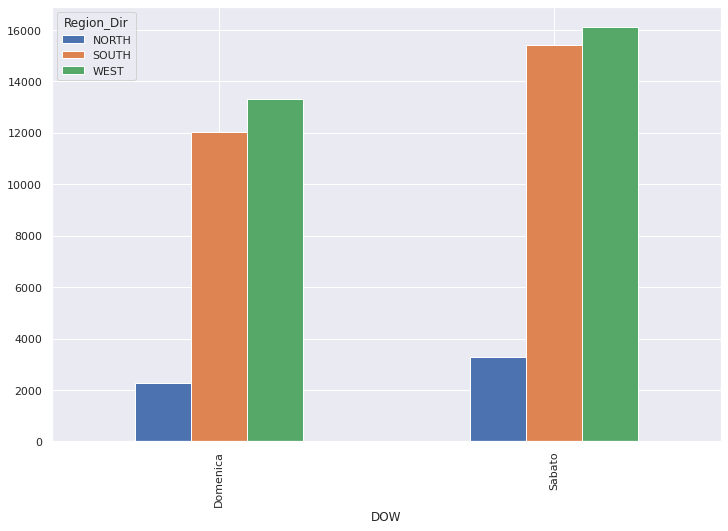

In [39]:
df_flow_direction = df_day_od.merge(df_comune_province_region, on=['COD_PRO',	'PRO_COM'])
print(df_flow_direction.shape)

# Extracting weekends
weekend = ['Sabato', 'Domenica']
weekend_flow = df_flow_direction.DOW.isin(weekend)

df_flow_direction_weekedn = df_flow_direction[weekend_flow]
grouped_weekend_flow = df_flow_direction_weekedn.groupby(['DOW', 'Region_Dir']).FLOW.sum()

# grouped_weekend_flow
grouped_weekend_flow = grouped_weekend_flow.unstack().drop(['ORG', 'OTHER'], axis=1)
grouped_weekend_flow.plot(kind='bar')

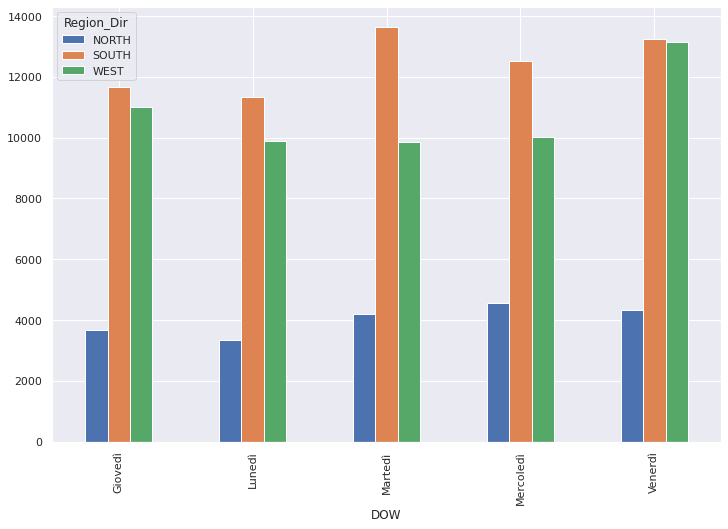

In [40]:
# Extractinf Working days
working_day = ['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì']
weekingday_flow = df_flow_direction.DOW.isin(working_day)

df_flow_direction_weekedn = df_flow_direction[weekingday_flow]
grouped_weekend_flow = df_flow_direction_weekedn.groupby(['DOW', 'Region_Dir']).FLOW.sum()

# grouped_weekend_flow

grouped_weekend_flow = grouped_weekend_flow.unstack().drop(['ORG', 'OTHER'], axis=1)

grouped_weekend_flow.plot(kind='bar')

# ***Task 3***

### **distribution of the number of visitors:**

Try to find a relation between number of users and the distance of their the province of origin

In [94]:
# Reading data of distance of different comune from each other
distances_path = '/content/drive/MyDrive/HLP/Veneto.txt'
distance_df = pd.read_csv(distances_path, sep=";").drop('Name', axis=1)

for column in distance_df.columns:
    # Try to fix the problem of data which numbers are spilited with ","
    distance_df[column] = distance_df[column].str.replace(',', '.').astype('float')

print(distance_df.info())
distance_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4241300 entries, 0 to 4241299
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Origine       float64
 1   Destinazione  float64
 2   Total_Minu    float64
 3   Total_Mete    float64
dtypes: float64(4)
memory usage: 129.4 MB
None


,Origine,Destinazione,Total_Minu,Total_Mete
0,1042.0,23059.0,129.69,243790.98
1,1042.0,23022.0,131.86,246794.26
2,1042.0,23082.0,133.84,253806.62
3,1042.0,23083.0,136.44,252084.96
4,1042.0,23043.0,136.47,251192.38


In [95]:
# Extracting Comune CODE of Padova
filter = df_codici_istat_comune.COMUNE == 'Padova'

padova_code = df_codici_istat_comune[filter].PRO_COM.values[0]
print(f'Padova cumone code is : {padova_code}')

Padova cumone code is : 28060


In [96]:
# All destination to padova
filter = distance_df.Destinazione == padova_code
padova_distance_df = distance_df[filter]
padova_distance_df.reset_index(drop=True, inplace=True)

print(padova_distance_df.shape)
padova_distance_df.head()

(7300, 4)


,Origine,Destinazione,Total_Minu,Total_Mete
0,1042.0,28060.0,182.10,345099.93
1,1043.0,28060.0,199.60,369509.86
2,1044.0,28060.0,213.41,413232.33
3,1045.0,28060.0,204.48,393681.55
4,1046.0,28060.0,204.99,386806.57


In [53]:
# Merge visitors dataset with its corespondig cumune 
df_visitor_comune_province_region = df_distinct_users_day.merge(df_comune_province_region, on=['COD_PRO', 'PRO_COM'])

# Extract number of visitor for every province using group by
df_visitor_province = df_visitor_comune_province_region.groupby('PROVINCIA')['VISITORS'].sum()
# change groupby serie to dataframe for later use
df_visitor_province = pd.DataFrame(df_visitor_province).reset_index()
print(df_visitor_province.shape)
df_visitor_province.head()

(105, 2)


,PROVINCIA,VISITORS
0,Agrigento,596
1,Alessandria,5540
2,Ancona,11656
3,Aosta,1416
4,Arezzo,4416


In [97]:
# Megring df_visitor_province dataset with Province dataset
df_visitor_province_pro_com = df_visitor_province.merge(df_codici_istat_provincia, on='PROVINCIA')
print(df_visitor_province_pro_com.shape)
# we need every province PRO_COM which is only in  cumune data set.
# So we merge it again with it so we can extract it
df_visitor_province_pro_com = df_visitor_province_pro_com.merge(df_codici_istat_comune,
                                                                left_on='PROVINCIA',
                                                                right_on='COMUNE')
df_visitor_province_pro_com.head()

(105, 6)


,PROVINCIA,VISITORS,COD_REG,COD_PRO_x,PROV_SIGLA,Direction,COD_PRO_y,PRO_COM,COMUNE,COMUNE_CAPOLUOGO
0,Agrigento,596,19,84,AG,A13,84,84001,Agrigento,1
1,Alessandria,5540,1,6,AL,A4M,6,6003,Alessandria,1
2,Ancona,11656,11,42,AN,A4M,42,42002,Ancona,1
3,Aosta,1416,2,7,AO,A4M,7,7003,Aosta,1
4,Arezzo,4416,9,51,AR,A4M,51,51002,Arezzo,1


In [98]:
# Merging every province number of visitor with their distance from padova
df_visitor_province_distance = df_visitor_province_pro_com.merge(padova_distance_df, left_on='PRO_COM', right_on='Origine')

# Remove padova itself from data set because distance is zero(It effect our linear model because of its high number of visitor)
filter = df_visitor_province_distance.Total_Mete == 0
df_visitor_province_distance = df_visitor_province_distance[~filter]

# Remove Veneto Province
# filter = df_visitor_province_distance.PROVINCIA == 'Venezia'
# df_visitor_province_distance = df_visitor_province_distance[~filter]

df_visitor_province_distance.head()

,PROVINCIA,VISITORS,COD_REG,COD_PRO_x,PROV_SIGLA,Direction,COD_PRO_y,PRO_COM,COMUNE,COMUNE_CAPOLUOGO,Origine,Destinazione,Total_Minu,Total_Mete
0,Alessandria,5540,1,6,AL,A4M,6,6003,Alessandria,1,6003.0,28060.0,165.76,313411.48
1,Ancona,11656,11,42,AN,A4M,42,42002,Ancona,1,42002.0,28060.0,173.15,325491.73
2,Aosta,1416,2,7,AO,A4M,7,7003,Aosta,1,7003.0,28060.0,216.00,414396.17
3,Arezzo,4416,9,51,AR,A4M,51,51002,Arezzo,1,51002.0,28060.0,156.38,295013.84
4,Ascoli Piceno,3936,11,44,AP,A4M,44,44007,Ascoli Piceno,1,44007.0,28060.0,224.06,435139.17


#linear regression:


In [134]:
from scipy import optimize


df = df_visitor_province_distance[['Total_Mete', 'VISITORS']].sort_values('Total_Mete', ascending=False)
df = df[df.VISITORS < 100000]
X = df['Total_Mete'].to_numpy()
y = df['VISITORS'].to_numpy()


In [135]:
X = np.reshape(X, (-1, 1))

In [136]:
y = np.reshape(y, (-1, 1))

In [102]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))

print(reg.coef_)

print(reg.intercept_)
X_c = np.linspace(100, 1300000, 10000)
X_c = np.reshape(X_c,(-1,1))
Y_pred = reg.predict(X_c)


0.1494306398691051
[[-0.02557197]]
[23809.11886516]


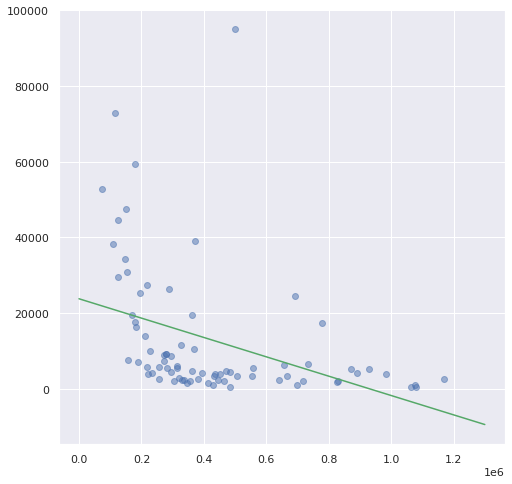

In [103]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=0.5)

plt.plot(X_c, Y_pred , color='g', label="linear regression", alpha=1)


#polinomial regression:

In [115]:
from sklearn.preprocessing import PolynomialFeatures
poly_pipline = PolynomialFeatures(degree=3, include_bias=True)
X_poly = poly_pipline.fit_transform(X)

#--------------

reg_poly = LinearRegression().fit(X_poly, y)
print(reg_poly.score(X_poly, y))

print(reg_poly.coef_)

print(reg_poly.intercept_)
X_c = np.linspace(100, 1300000, 10000)
X_c = np.reshape(X_c,(-1,1))
X_c_poly = poly_pipline.fit_transform(X_c)
Y_pred_poly = reg_poly.predict(X_c_poly)

0.33752466046593244
[[ 0.00000000e+00 -3.20852574e-01  5.15872042e-07 -2.55240273e-13]]
[67519.22101328]


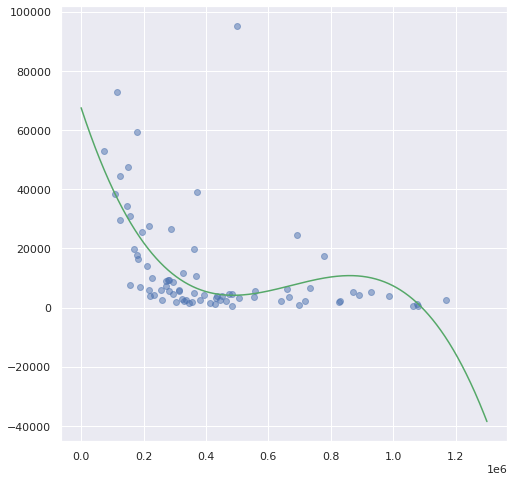

In [116]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=0.5)
plt.plot(X_c, Y_pred_poly , color='g', label="linear regression", alpha=1)

#exponentional regression:

In [121]:
fit = np.polyfit(X.reshape((-1,)), np.log(y), 1)

In [122]:
print(fit)

[[-2.54573874e-06]
 [ 9.82716758e+00]]


ln(y) = 9.82716758 + -2.54573874e-06*(x)

Applying E to both side we have :

y = 18530.394*0.9999975^(X)

In [123]:
# lambda :  y = 18530.394*0.9999975^(X)
f = lambda x: 18530.394*0.9999975**(x)
X_c_exp = np.linspace(100, 1300000, 10000)
y_exp = f(X_c_exp)


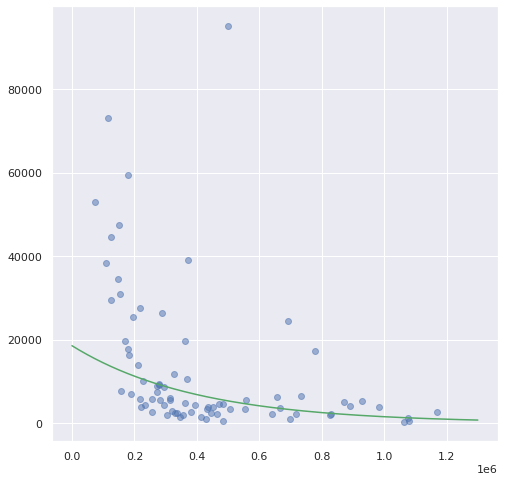

In [124]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=0.5)
plt.plot(X_c_exp, y_exp , color='g', label="linear regression", alpha=1)

#custom functions regression:

y = a/(x+b) + c




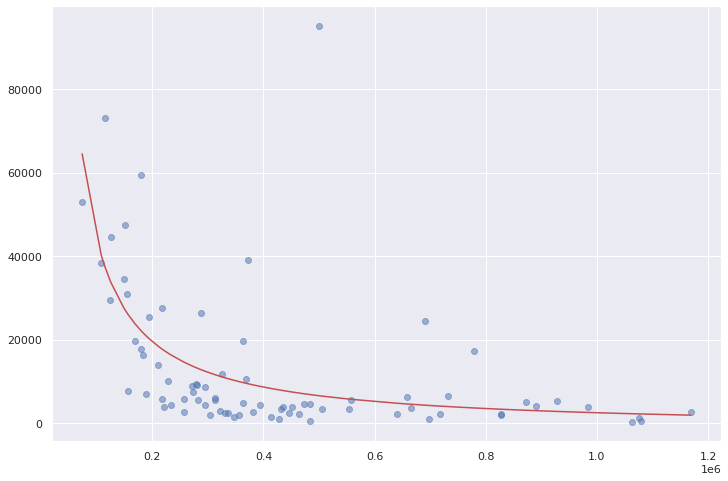

In [149]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return ((a)/(x+b))+c


plt.scatter(X, y, alpha=0.5)
popt, pcov = curve_fit(func, X.reshape((-1,)), y.reshape((-1,)))
plt.plot(X, func(X, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [156]:
# List of province that have highest discrepancies
df_visitor_province_distance[df_visitor_province_distance.VISITORS > 90000].sort_values('VISITORS')[['PROVINCIA', 'VISITORS']]

,PROVINCIA,VISITORS
64,Roma,95056
65,Rovigo,163464
44,Milano,177380
81,Verona,181604
75,Treviso,317224
83,Vicenza,427492
79,Venezia,620236


# ***Group Members:***
1. Behzad Irani

2. Hasan Jahanifar

3. Mona Heydari